In [4]:
%matplotlib inline

### Test glue_tree from Newick

Change Kernel to `glueviz-dev`.

In [9]:
from config import *

import numpy as np

In [51]:
# parse the example Newick

test = read_newick('tmp.nwk')

for ID in test.component_ids():
    
    print(ID, ':', test[ID])

Pixel Axis 0 [x] : [0 1 2 3 4 5]
World 0 : [0 1 2 3 4 5]
parent : [-1  0  0  0  3  3]
names : ['' 'A' 'B' '' 'C' 'D']
size : [0.  0.1 0.2 0.5 0.3 0.4]


In [52]:
# identify the leafness of each structures

leafness = []

for pix in range(len(test['parent'])):
    
    if pix != (len(test['parent'])-1):
        leafness.append('leaf' if (test['parent'][pix] >= test['parent'][pix+1]) else 'branch')
    else:
        leafness.append('leaf')

In [62]:
# identify the direct children of each branch

children = []

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    if leafness[pix] == 'branch':
        
        child = idx[(test['parent'] == idx[pix])]
        
    else:
        
        child = np.array([])
        
    children.append(child)

In [54]:
# calculate x-positions following astrodendro

x_pos = np.zeros(len(test['parent']))

idx = np.array(range(len(test['parent'])))

## leaves
_cached_pos = 1.
for pix in idx[(np.array(leafness) == 'leaf')]:
    
    x_pos[pix] = _cached_pos
    _cached_pos += 1.
    
    
nlevels = 5
for level in np.array(range(nlevels)):
    for pix in idx[(np.array(leafness) == 'branch')]:
        
        if x_pos[pix] == 0.:
            
            if np.all(x_pos[children[pix]] != 0.):
                
                x_pos[pix] = np.mean(x_pos[children[pix]])
                
            else:
                
                continue
                
        else:
            
            continue
    

In [68]:
# heights

heights = np.zeros(len(test['parent']))

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    heights[idx[(test['parent'] == pix)]] += test['size'][pix]
    
heights = heights + test['size']

In [77]:
# vertices for vertical lines

verts = []

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    if test['parent'][pix] == -1:
        
        vert = np.array([[x_pos[pix], 0.],
                         [x_pos[pix], heights[pix]]])
    
    else:
        
        vert = np.array([[x_pos[pix], heights[test['parent'][pix]]],
                         [x_pos[pix], heights[pix]]])
    
    verts.append(vert)
    
    
# vertices for horizontal lines
verts_horiz = []

for pix in idx:
    
    if leafness[pix] == 'branch':
        
        vert = np.array([[x_pos[idx[(test['parent'] == pix)][0]], heights[pix]],
                         [x_pos[idx[(test['parent'] == pix)][-1]], heights[pix]]])
        
    else:
        
        continue
        
    verts_horiz.append(vert)

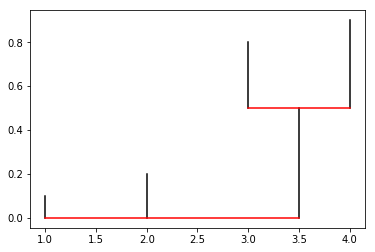

In [78]:
# test plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

idx = np.array(range(len(test['parent'])))

for pix in idx:
    
    ax.plot(verts[pix][:, 0],
            verts[pix][:, 1],
            color = 'k')
    
for pix in np.array(range(len(verts_horiz))):
    
    ax.plot(verts_horiz[pix][:, 0],
            verts_horiz[pix][:, 1],
            color = 'r')

______
### Test astrodendro

Change Kernel to the default.

In [28]:
from astropy.io import fits
from astrodendro import Dendrogram
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [14]:
!ls data

obsvL1689_AV.fits obsvL1689_AV.hdf5


In [35]:
data = fits.open('data/obsvL1689_AV.fits')
dendro = Dendrogram.load_from('data/obsvL1689_AV.hdf5')

p_dendro = dendro.plotter()
paths = p_dendro.get_lines().get_paths()

In [79]:
dendro

NameError: name 'dendro' is not defined

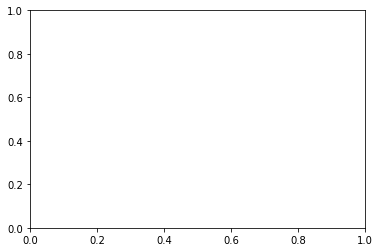

In [31]:
fig = plt.figure()
ax = fig.gca()

patch = patches.PathPatch(test[2],
                          edgecolor = 'k',
                          lw = 10.)

ax.add_patch(patch)